In [2]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# Transformar imagenes a escala de grises 

x_train = x_train / 255.0


In [5]:
# Tranfsormar etiquetas a valores del 0-9 con one hot encoding

y_train_oh = to_categorical(y_train, num_classes=10)
y_test_oh = to_categorical(y_test, num_classes=10)

In [6]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

c:\Users\xavif\Documents\MASTER\MNIST\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
history = model.fit(
    x_train,
    y_train_oh,
    validation_split=0.2,
    epochs=10,
    batch_size=32
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9978 - loss: 0.0099 - val_accuracy: 1.0000 - val_loss: 4.8901e-07
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 1.0000 - loss: 2.4606e-07 - val_accuracy: 1.0000 - val_loss: 8.8410e-08
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 1.0000 - loss: 6.0742e-08 - val_accuracy: 1.0000 - val_loss: 2.9434e-08
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 1.0000 - loss: 2.1879e-08 - val_accuracy: 1.0000 - val_loss: 1.1464e-08
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 1.0000 - loss: 9.1393e-09 - val_accuracy: 1.0000 - val_loss: 5.1160e-09
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 1.0000 - loss: 4.2965e-09 - val_accuracy: 1.0000 - val_loss: 2.4835e-09
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 1.0000 - loss: 2.0911e-09 - val_accuracy: 1.0000 - val_loss: 1.2517e-09
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━

In [9]:
y_pred_prob = model.predict(x_test)

y_pred = np.argmax(y_pred_prob, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


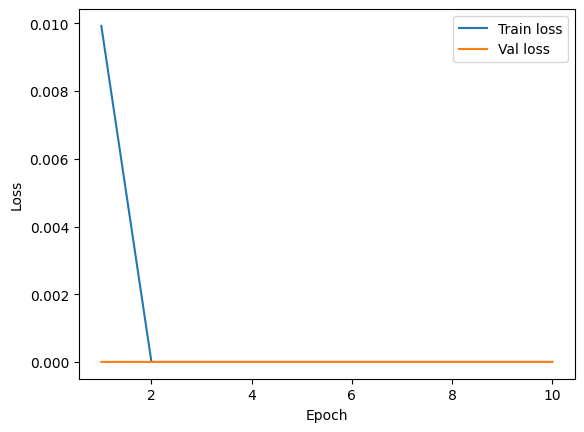

In [10]:
epochs = range(1, len(history.history['loss']) + 1)

plt.plot(epochs, history.history['loss'], label='Train loss')
plt.plot(epochs, history.history['val_loss'], label='Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

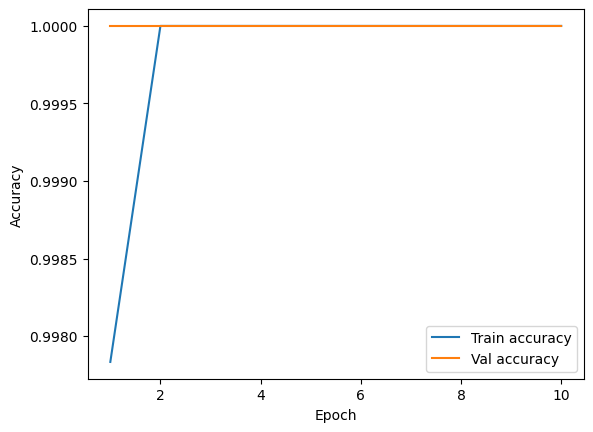

In [11]:
plt.plot(epochs, history.history['accuracy'], label='Train accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='Val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

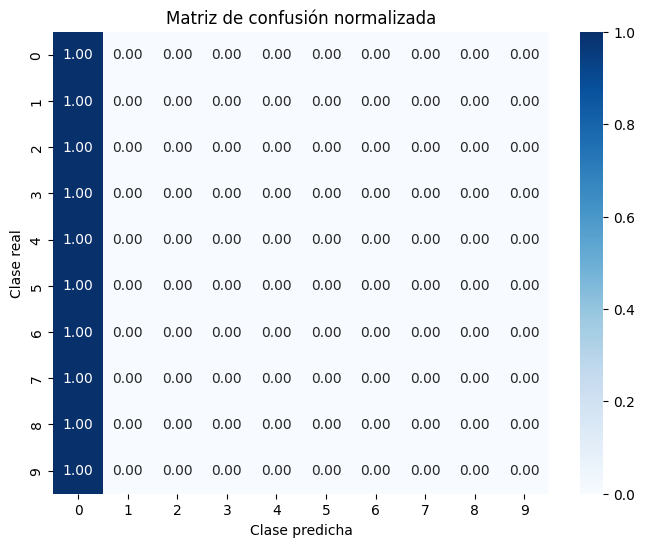

In [12]:
# Calcular matriz de confusión
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm / cm.sum(axis=1, keepdims=True)

# Etiquetas de las clases
labels = [str(i) for i in range(10)]

# Visualización con Seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Clase predicha")
plt.ylabel("Clase real")
plt.title("Matriz de confusión normalizada")
plt.show()

In [13]:
from sklearn.metrics import classification_report
import pandas as pd

# Calculate metrics
report = classification_report(y_test, y_pred, output_dict=True)

# Create a DataFrame for the metrics table
metrics_df = pd.DataFrame(report).transpose()

# Display the table
print("Metrics Table:")
display(metrics_df)


Metrics Table:


c:\Users\xavif\Documents\MASTER\MNIST\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\xavif\Documents\MASTER\MNIST\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\xavif\Documents\MASTER\MNIST\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

,precision,recall,f1-score,support
0,0.098000,1.000,0.178506,980.000
1,0.000000,0.000,0.000000,1135.000
2,0.000000,0.000,0.000000,1032.000
3,0.000000,0.000,0.000000,1010.000
4,0.000000,0.000,0.000000,982.000
5,0.000000,0.000,0.000000,892.000
6,0.000000,0.000,0.000000,958.000
7,0.000000,0.000,0.000000,1028.000
8,0.000000,0.000,0.000000,974.000
9,0.000000,0.000,0.000000,1009.000
